***FCIM.FIA - Fundamentals of Artificial Intelligence***

> **Lab 1:** *Learning* \\
> **Performed by:** *Dan, Hariton, group *FAF-211* \\
> **Verified by:** Elena Graur, asist. univ.

*Imports and Utils*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Task 1 & 2
### Import the provided data. Make a detailed dataset analysis and present some statistics in the form of Matplotlib or Seaborn visualisations. Pre-process the data if necessary
### Based on the analysis from task 1, perform Feature Selection. You should state which columns you will be using for the final predictions and show why you are choosing the respective columns. 


Read 'data.csv' into a pandas DataFrame using the read_csv function. The DataFrame is stored in the variable df and then displayed.

In [3]:
df = pd.read_csv('data.csv')

C:\Users\Dan\AppData\Local\Temp\ipykernel_13104\1507164070.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data.csv')


In the next steps I used df and info() for visualisation of basic and more in depth stats

In [4]:
df

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
148649,148650,Roy I Tillery,Custodian,0.00,0.00,0.00,0.00,0.00,0.00,2014,NaN,San Francisco,PT
148650,148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148651,148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN
148652,148653,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,NaN,San Francisco,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


Earlier I saw that the column EmployeeName had some rows as Not provided so I ignore this rows because they are irrelevant for our scope

In [6]:
df = df[df["EmployeeName"] != "Not provided"]
df["BasePay"].value_counts()

BasePay
0.0          875
0.00         423
54703.00     327
55026.0      297
48472.4      210
            ... 
212739.13      1
155966.02      1
167411.18      1
15.50          1
99722.0        1
Name: count, Length: 109899, dtype: int64

Based on the info and examination of our data set I dropped the follow columns. Notes are all empty, Agency is the same for all employee, status is a column that is mostly empty so I consider that it holds little value for our model. For the JobTitle, its too broad to be used since it has very specific job titles and for the EmployeeName we dont have a specific need for them since we are looking at Id as the unique identifier

In [7]:
df.drop(["Notes", "Agency", "Status", "EmployeeName", "JobTitle"], axis= 1 ,inplace=True)

C:\Users\Dan\AppData\Local\Temp\ipykernel_13104\3039764218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(["Notes", "Agency", "Status", "EmployeeName", "JobTitle"], axis= 1 ,inplace=True)


I checked the types of the remaining columns in order to see if they are viable for our model

In [8]:
df.dtypes

Id                    int64
BasePay              object
OvertimePay          object
OtherPay             object
Benefits             object
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

Since our model cannot process the object columns and all of them should be a numeric value I converted them into numbers

In [9]:
df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]] = df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]].apply(pd.to_numeric)

C:\Users\Dan\AppData\Local\Temp\ipykernel_13104\3746966342.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]] = df[["BasePay", "OvertimePay", "OtherPay", "Benefits"]].apply(pd.to_numeric)


In [10]:
df.dtypes

Id                    int64
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
dtype: object

The next step of our Data Cleaning was to check the null values in our dataFrame

In [11]:
df.isnull().sum()

Id                      0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
dtype: int64

Since BasePay and Benefits are the 2 columns with null values I replaced them with 0 because, in case someone doesnt have a BasePay we can assume that they dont have a job and for the Benefits we can consider them as not having any benefits.

In [12]:
df.fillna({"BasePay":0}, inplace=True)
df.fillna({"Benefits":0}, inplace=True)

C:\Users\Dan\AppData\Local\Temp\ipykernel_13104\2506153665.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"BasePay":0}, inplace=True)
C:\Users\Dan\AppData\Local\Temp\ipykernel_13104\2506153665.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.fillna({"Benefits":0}, inplace=True)


Since there cannot be an overtime pay without having a base pay in the first place I dropped the rows where this condition was True

In [13]:
# all the rows where basepay is 0 but overtimepay is not 0
df = df[~((df["BasePay"] == 0) & (df["OvertimePay"] != 0))]
df

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,2,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,3,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,4,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,5,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...
148645,148646,0.00,0.00,0.00,0.0,0.00,0.00,2014
148647,148648,0.00,0.00,0.00,0.0,0.00,0.00,2014
148648,148649,0.00,0.00,0.00,0.0,0.00,0.00,2014
148649,148650,0.00,0.00,0.00,0.0,0.00,0.00,2014


The next part is related to another observation I made earlier. There were some rows that had negative values which for our columns would not make sense so we can ignore them and eliminate them from our data set

In [14]:
df = df[df["BasePay"] >= 0]
df = df[df["OvertimePay"] >= 0]
df = df[df["OtherPay"] >= 0]
df = df[df["Benefits"] >= 0]
df

,Id,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,2,155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,3,212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,4,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,5,134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011
...,...,...,...,...,...,...,...,...
148644,148645,0.00,0.00,0.00,0.0,0.00,0.00,2014
148645,148646,0.00,0.00,0.00,0.0,0.00,0.00,2014
148647,148648,0.00,0.00,0.00,0.0,0.00,0.00,2014
148648,148649,0.00,0.00,0.00,0.0,0.00,0.00,2014


Id does not hold any particular value anymore for use so we can drop it too

In [15]:
df = df.drop("Id", axis=1)

In [16]:
df.describe()

,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
count,148552.000000,148552.000000,148552.000000,148552.000000,148552.000000,148552.000000,148552.000000
mean,66097.005206,5067.875989,3642.406810,18936.219956,74807.288006,93743.507962,2012.523063
std,42867.802421,11456.803182,8020.499811,17164.424272,50504.472750,62777.630521,1.117583
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2011.000000
25%,32908.792500,0.000000,0.000000,0.000000,36265.885000,44240.827500,2012.000000
50%,64892.670000,0.000000,810.210000,23263.525000,71455.890000,92440.640000,2013.000000
75%,94632.712500,4660.640000,4232.465000,33475.627500,105874.842500,132913.480000,2014.000000
max,319275.010000,245131.880000,400184.250000,96570.660000,567595.430000,567595.430000,2014.000000


In the following section I created some basic scatter plots and a pair plot to get some ideas about our values, their distribution and the relation between our remaining columns

Text(0, 0.5, 'TotalPay')

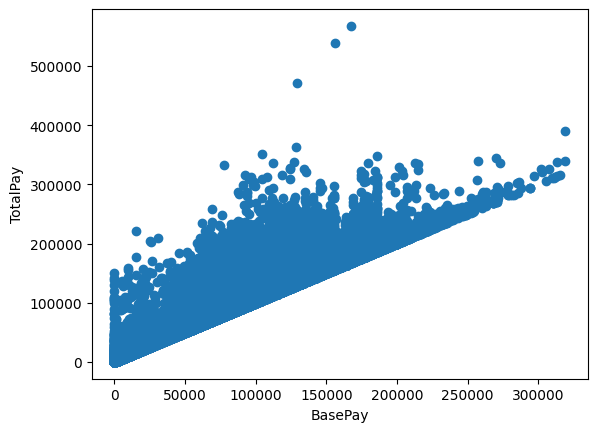

In [34]:
plt.scatter(df['BasePay'], df['TotalPay'])

plt.xlabel("BasePay")
plt.ylabel("TotalPay")

Text(0, 0.5, 'TotalPay')

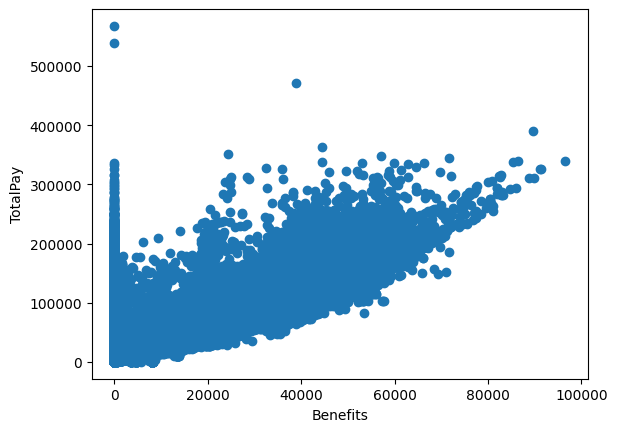

In [16]:
plt.scatter(df['Benefits'], df['TotalPay'])

plt.xlabel("Benefits")
plt.ylabel("TotalPay")

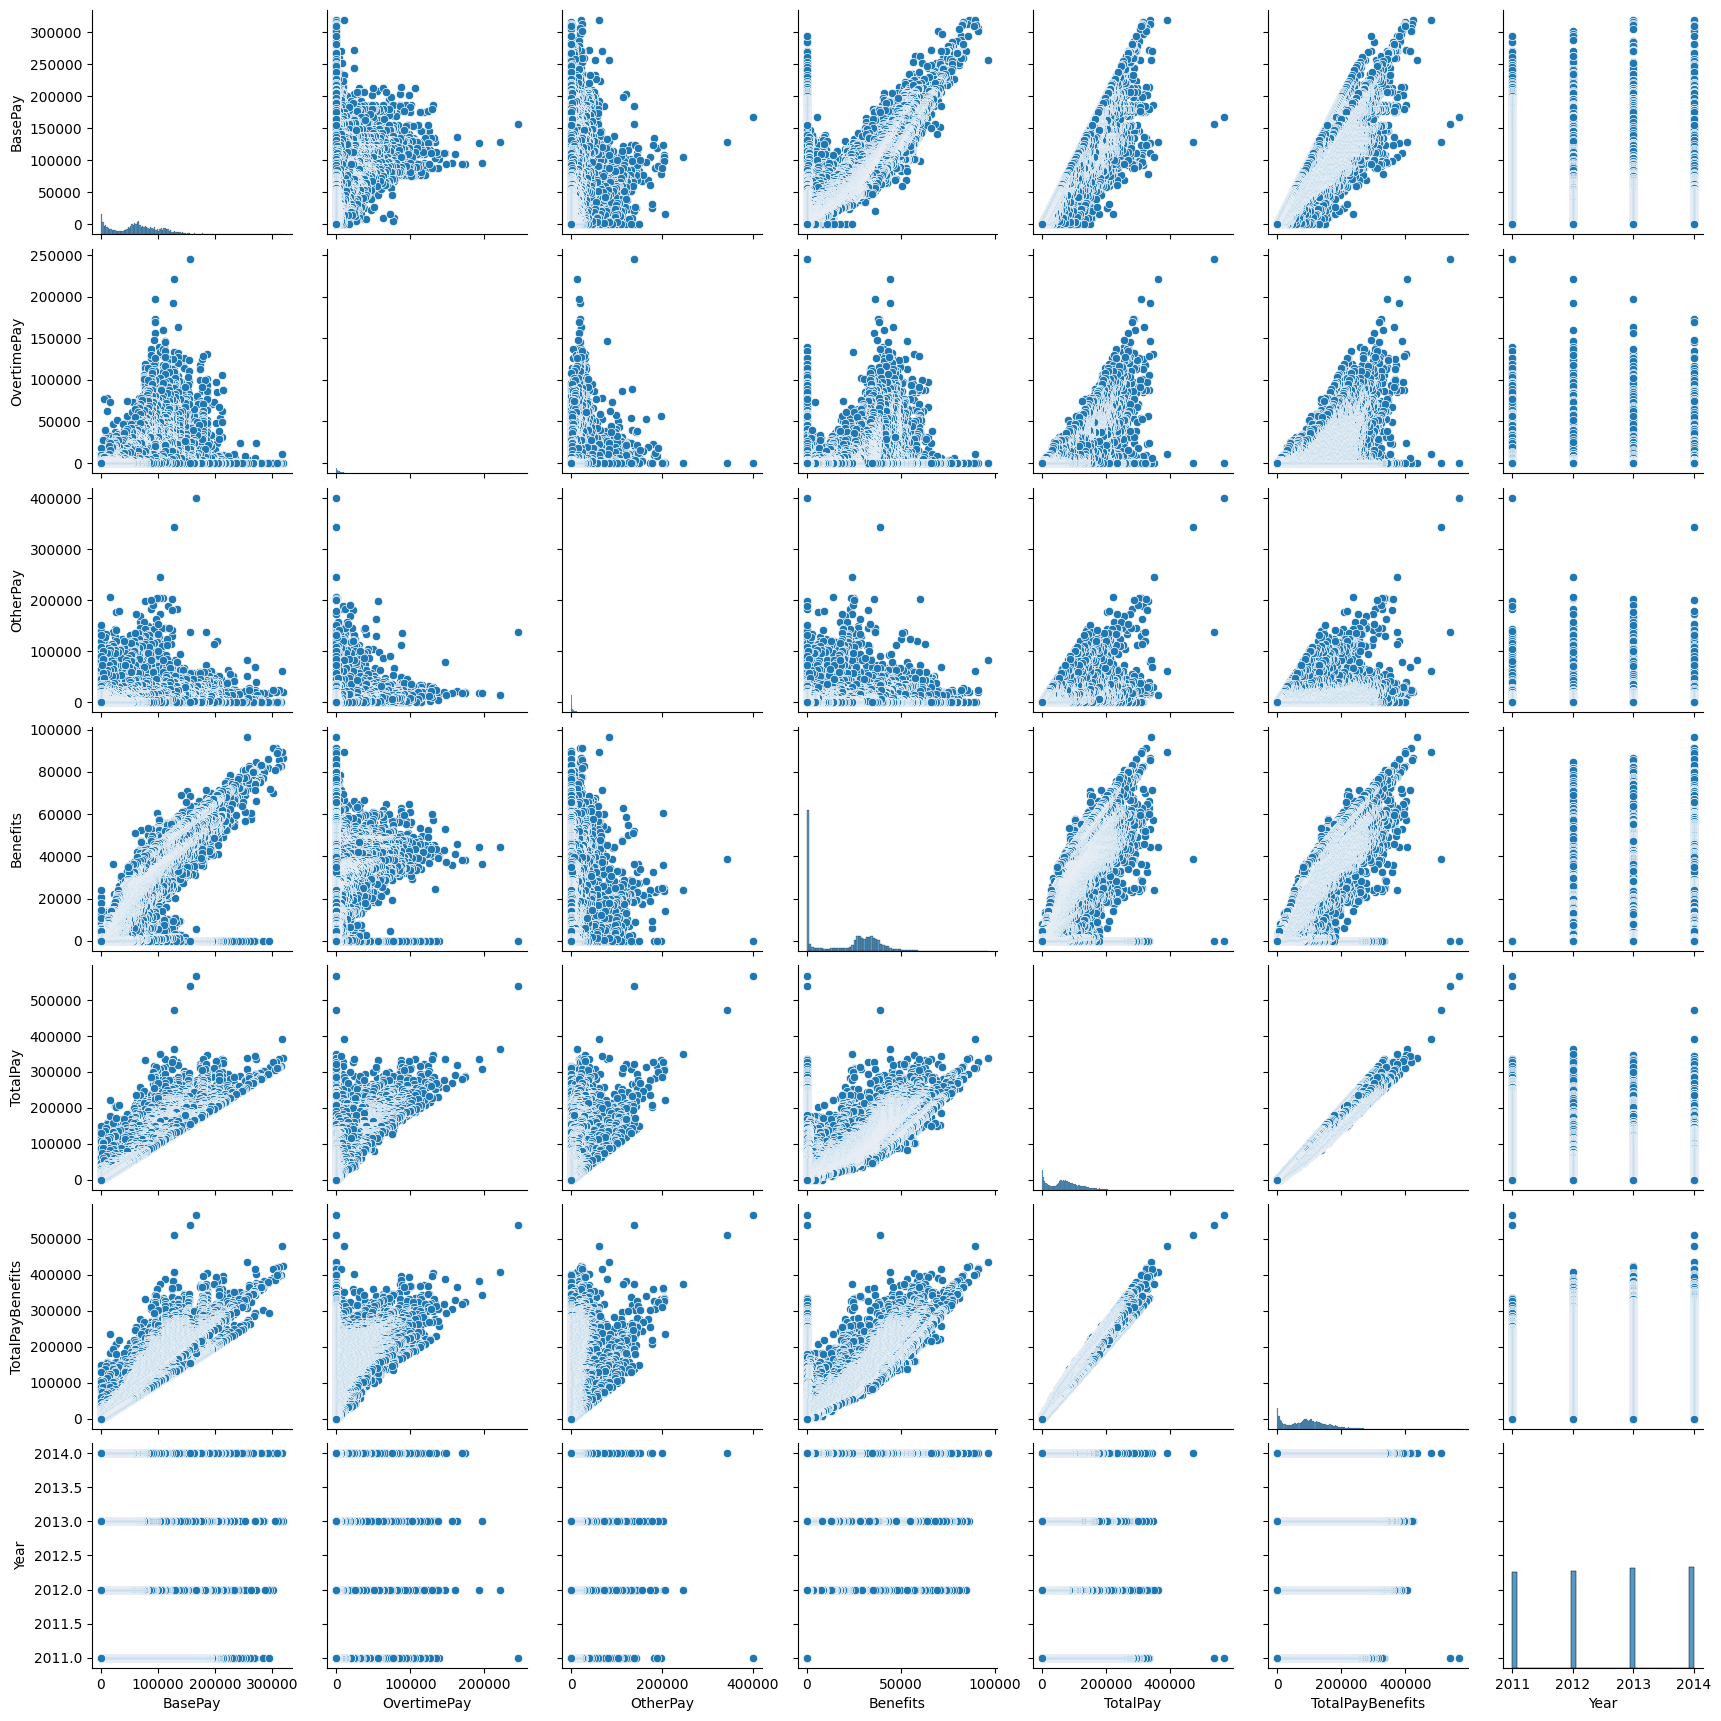

In [17]:
sns.pairplot(df)

An important part is the correlations between our features, so I created a correlation matrix

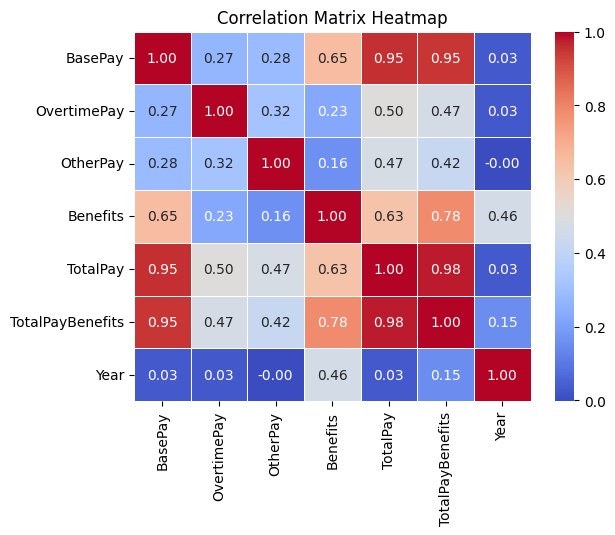

In [17]:
correlation_matrix = df.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

We can see that TotalPay and TotalPayBenefits have a big correlation with our BasePay so we can base our prediction around these columns. We can drop the Year Column since its doesnt help us in any way and we can drop the TotalPay column since its the sum of the BasePay, OvertimePay and OtherPay and its not bringing any new information

In [17]:
df.drop(["TotalPay", "Year"], axis= 1 ,inplace=True)

I chose to use OvertimePay, OtherPay, Benefits to determine the TotalPayBenefits and I will focus the rest of the data set around these columns. For now I will create take into consideration the rows that have a BasePay above 0 for the overtime to be present and relevant

In [18]:
df = df[df["BasePay"] >0]
df

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits
0,167411.18,0.00,400184.25,0.00,567595.43
1,155966.02,245131.88,137811.38,0.00,538909.28
2,212739.13,106088.18,16452.60,0.00,335279.91
3,77916.00,56120.71,198306.90,0.00,332343.61
4,134401.60,9737.00,182234.59,0.00,326373.19
...,...,...,...,...,...
148613,19.97,0.00,0.00,4.30,24.27
148616,21.48,0.00,0.86,0.22,22.56
148617,17.26,0.00,0.00,4.04,21.30
148619,6.04,0.00,10.05,2.30,18.39


I've created the corr matrix once again to see the remaining features and confirm that we will still focus on the OvertimePay, OtherPay and Benefits to predict the TotalPayBenefits and we will not use BasePay because the corr between BasePay and TotalBenefitsPay its too big

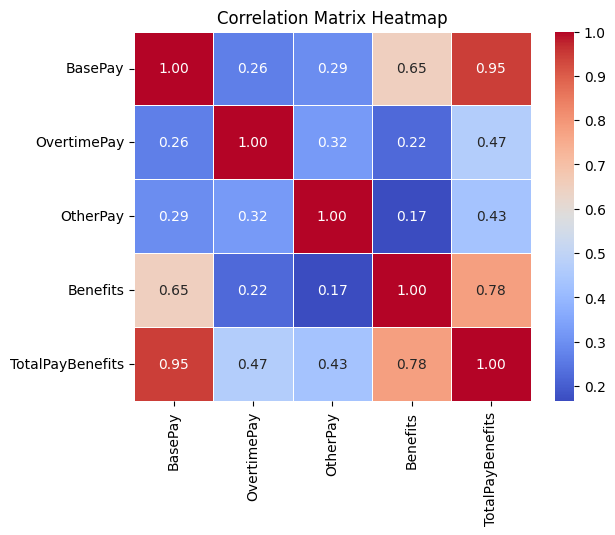

In [19]:
correlation_matrix = df.corr()


sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Display the heatmap
plt.title('Correlation Matrix Heatmap')
plt.show()

In [20]:
# from sklearn.preprocessing import StandardScaler

# standardcase = StandardScaler()
# df_standard = pd.DataFrame(standardcase.fit_transform(df), columns=df.columns)
# df_standard.describe()
df

,BasePay,OvertimePay,OtherPay,Benefits,TotalPayBenefits
0,167411.18,0.00,400184.25,0.00,567595.43
1,155966.02,245131.88,137811.38,0.00,538909.28
2,212739.13,106088.18,16452.60,0.00,335279.91
3,77916.00,56120.71,198306.90,0.00,332343.61
4,134401.60,9737.00,182234.59,0.00,326373.19
...,...,...,...,...,...
148613,19.97,0.00,0.00,4.30,24.27
148616,21.48,0.00,0.86,0.22,22.56
148617,17.26,0.00,0.00,4.04,21.30
148619,6.04,0.00,10.05,2.30,18.39


## Task 2 part 2
### Perform Linear Regression on your train set, using the selected features.  

I performed the spliting using sklearn and split my data set into a training set and a validation set

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(df.drop(columns=['TotalPayBenefits', 'BasePay']), df['TotalPayBenefits'], random_state=0, test_size=0.3)
X_train

,OvertimePay,OtherPay,Benefits
104193,168.60,0.00,4419.72
82321,33562.76,6219.94,29442.98
53851,8337.87,3709.94,28680.82
136676,1898.36,2954.94,15602.91
148433,0.00,4.96,2.17
...,...,...,...
42447,3210.76,20789.07,32723.77
98535,7502.11,1127.78,21944.00
96834,672.98,1116.25,26034.25
119445,38550.08,5193.47,36193.08


Using sklearn and startard scaler from it we standardized the values for easier processing

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

Using sklearn we used the implemented Linear Regression to create our own model and train it using our train set and predict values using our validation set

In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_train_pred =  model.predict(X_train_scaled)
y_val_pred =  model.predict(X_val_scaled)

## Task 3
### Train at least two new Linear Regression models. You can use one of the following: Ridge, Lasso, Elastic Net Regularization, Ordinary Least Squares, Least-angle Regression (LAR).

## Task 4
### Show the performance of your models. You can use one or multiple metrics that you consider more suitable for your case (e.g. MAE, MSE, RMSE, etc.) and explain why you decided to use them. Make conclusions on the obtained results and the performance of each of the developed models. 

In the next cells we trained 2 new models using Lasso and Ridge models and used MSE and MAE metrics to see the performance of our models

In [24]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [25]:
print(mean_squared_error(y_val, y_val_pred))
print(mean_absolute_error(y_val, y_val_pred))

model.score(X_val_scaled, y_val)

988923549.5990418
24477.24544126477


0.7485077696091837

In [26]:
model_lasso = Lasso()
model_lasso.fit(X_train_scaled, y_train)

y_val_pred = model_lasso.predict(X_val_scaled)

print(mean_squared_error(y_val, y_val_pred))
print(mean_absolute_error(y_val, y_val_pred))

model_lasso.score(X_val_scaled, y_val)

988922651.6288096
24477.37245004989


0.7485079979711604

In [27]:
model_ridge = Ridge()
model_ridge.fit(X_train_scaled, y_train)

y_val_pred = model_ridge.predict(X_val_scaled)

print(mean_squared_error(y_val, y_val_pred))
print(mean_absolute_error(y_val, y_val_pred))

model_ridge.score(X_val_scaled, y_val)

988923503.6440294
24477.27894004071


0.7485077812959604

After testing each of our models, we can see that they all perform the same and the accuracy is similar for all of our models with little differences that are irrelevant

## Task 5
### Cluster your data and show a visual representation of it (you can use K-means, for example, or another algorithm you consider suitable).

['OvertimePay', 'OtherPay', 'Benefits']


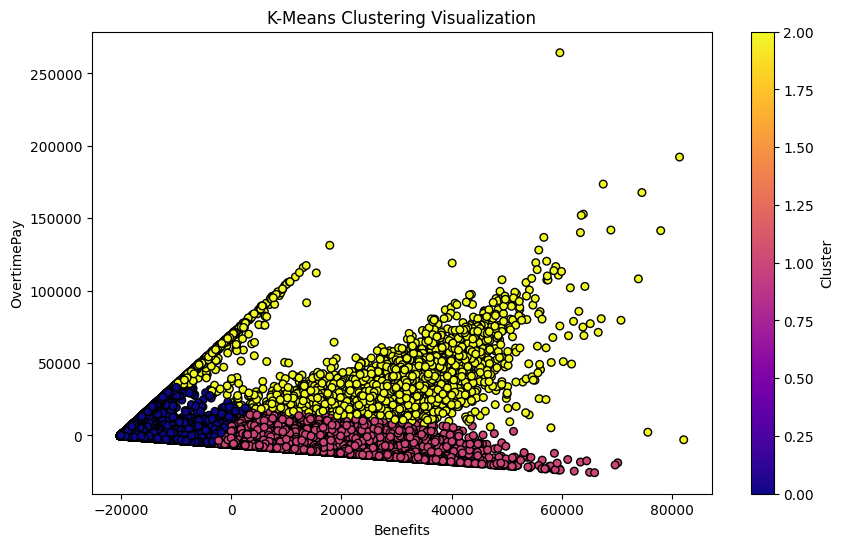

In [28]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_train)
features = list(X_train.columns)
print(features)
component_names = []
pca = PCA(n_components=2)
data_pca = pca.fit_transform(X_train)
loadings = pca.components_

for i, component in enumerate(loadings[:2], start=1):
    component_names.append(features[np.argmax(np.abs(component))])

plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=clusters, cmap='plasma', marker='o', edgecolor='k', s=30)
plt.title("K-Means Clustering Visualization")
plt.xlabel(f"{component_names[0]}")
plt.ylabel(f"{component_names[1]}")
plt.colorbar(label="Cluster")
plt.show()


## Task 6
### Draw conclusions on the obtained clusters. Analyze the values predicted by your best Linear Regression model and resultant clusters. 

The visualization shows three distinct clusters (yellow, purple, and dark blue). The features Benefits and OvertimePay influence the clustering significantly:

- Cluster 1 (Dark Blue): Represents individuals with low benefits and low overtime pay.
- Cluster 2 (Purple): Includes individuals with slightly higher benefits but still moderate overtime pay.
- Cluster 3 (Yellow): Captures individuals with the highest overtime pay, distributed across varying levels of benefits.


Model Performance: 
- All three models (Linear Regression, Ridge, and Lasso) performed similarly, with an R² of ~0.75 and an RMSE of ~24,477. This indicates that the models have an accuracy of about 75% of the based on the target variable.

Relationship to Clusters:
- The models were trained to predict a continuous target variable TotalPayBenefits.
- The clustering, however, provides categorical insights into groups that differ in key attributes like "Benefits" and "OvertimePay."


From the clustering and the model's task, "Benefits" and "OvertimePay" are critical features influencing both predictions and cluster formation. This supports their inclusion in the regression models and highlights their significance in explaining variability in compensation.

Cristina Tarna helped me with the Data Cleaning and explained Clustering